# Noteboook Imports and Packages

In [28]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [29]:
def f(x):
    return x**2 + x + 1

In [30]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)

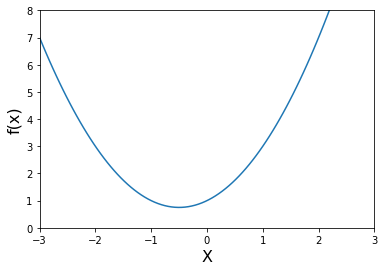

In [31]:
# Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives
   

In [32]:
def df(x):
    return 2*x + 1

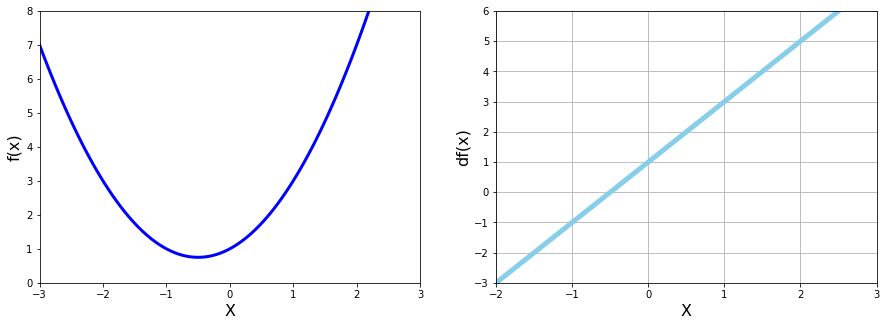

In [33]:
# Plot function and derivative side by side
plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)


#2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim(-3,6)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [34]:
# Python For Loop
for n in range(5):
    print('Hello world', n)
print('End of Loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of Loop


In [35]:
# Python while loop
counter = 0
while counter < 5:
    print('Counting...', counter)
    counter= counter+1
print('Ready or not, here I come!')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Ready or not, here I come!


In [36]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
#     print(step_size)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is ', f(new_x))

Loop ran this many times:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is  0.7500000015970362


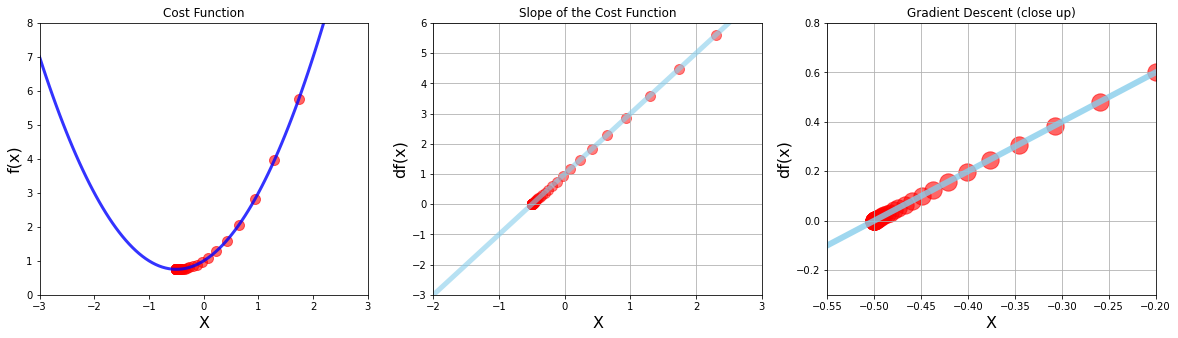

In [37]:
# Superimpose the gradient descent calculations on plots
plt.figure(figsize=[20,5])

# 1 Chart: Cost function
plt.subplot(1,3,1)

plt.title('Cost Function')
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)


values = np.array(x_list) # need to cast x_list first
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)


#2 Chart: Derivative
plt.subplot(1,3,2)

plt.title('Slope of the Cost Function')
plt.xlim([-2,3])
plt.ylim(-3,6)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

#3 Chart: Derivative (Close Up)
plt.subplot(1,3,3)

plt.title('Gradient Descent (close up)')
plt.xlim([-0.55,-0.2])
plt.ylim(-0.3,0.8)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)

plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advance Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [38]:
# Make some data

x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

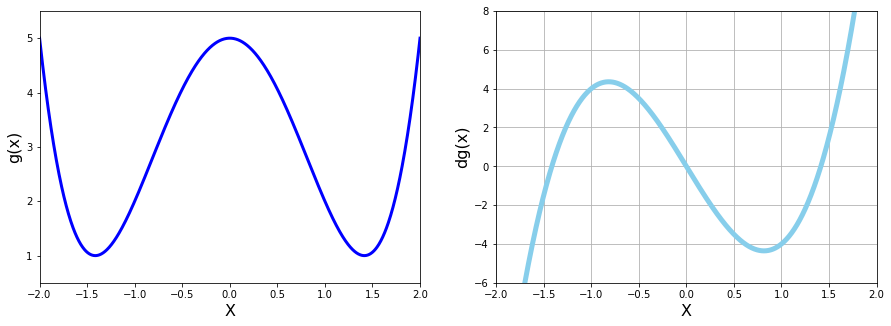

In [39]:
# Plot function and derivative side by side
plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)


#2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim(-6,8)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [40]:
# Gradient Descent
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):

    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            break
    return new_x, x_list, slope_list
    

In [41]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [42]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=-0.5,multiplier=0.01,precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [43]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


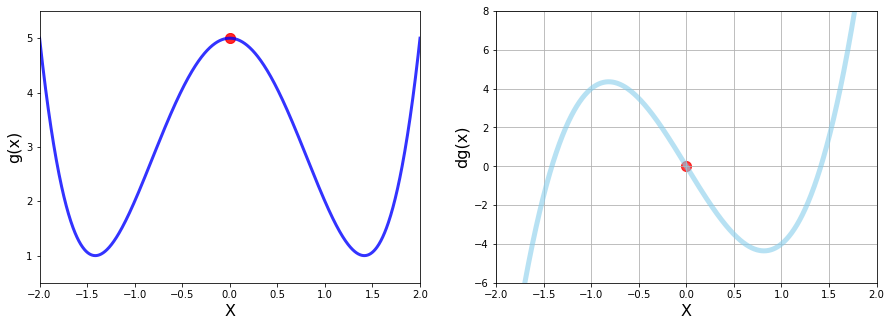

In [44]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=0)

# Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim(-6,8)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 24$$

In [45]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

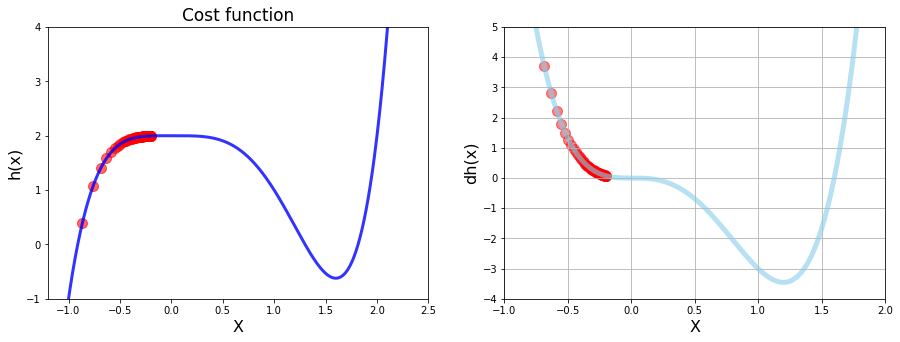

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [49]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh,initial_guess=-0.2, max_iter=70)

# Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()
print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [50]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

# Python Tuples

In [61]:
# Creating a tuple
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# How to access a value in tuple
print('I love ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Bangkae', 'Bangkok', 10160

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, side, greens = breakfast
print('Main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is ', data_tuple[0])
print('Cost at the last x value is ', h(data_tuple[0]))
print('Number of steps is ', len(data_tuple[1]))

I love  bacon
My hotel has no 4th floor
Main course is  bacon
Local min is  1.5989534547394717
Cost at the last x value is  -0.6214287992331258
Number of steps is  117
